# IMPORTING NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis (EDA)

# Loading th dataset

In [ ]:
data=pd.read_csv('train.csv')

In [ ]:
# Display the first five rows of the dataset
data.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
# Get information about the dataset, including data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [ ]:
# Generate descriptive statistics for numerical columns
data.describe()

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


# Get the Shape of the Data

In [ ]:
data.shape

(215, 15)

# Data Cleaning

# Check for Missing Values

In [ ]:
data.isnull().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


# Check for Duplicates

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isna().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


# Handling missing values

In [ ]:
# Impute missing salary values for "Placed" students with the median salary, and fill "Not Placed" with 0
median_salary = data['salary'].median()

# Filling salary based on status
data['salary'] = data.apply(lambda x: median_salary if x['status'] == 'Placed' and pd.isnull(x['salary']) else (0 if x['status'] == 'Not Placed' else x['salary']), axis=1)




# Encoding categorical features

In [ ]:
# Encode categorical columns: 'gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status'
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Check the result of encoding and filled missing values
data[['salary', 'status', 'gender', 'workex']].head()

,salary,status,gender,workex
0,270000.0,1,0,0
1,200000.0,1,0,1
2,250000.0,1,0,0
3,0.0,0,0,0
4,425000.0,1,0,0


## Categorical Columns and Encodings

- **gender**:
  - Female = 0
  - Male = 1

- **ssc_b**:
  - Others = 0
  - Central = 1

- **hsc_b**:
  - Others = 0
  - Central = 1

- **hsc_s**:
  - Commerce = 0
  - Science = 1
  - Arts = 2

- **degree_t**:
  - Others = 0
  - Commerce & Management = 1
  - Science and Technology = 2

- **workex**:
  - No = 0
  - Yes = 1

- **specialisation**:
  - Marketing & HR = 0
  - Marketing & Finance = 1

- **status**:
  - Not Placed = 0
  - Placed = 1


In [ ]:
data["status"].value_counts()

,count
status,
1,148
0,67


# Display the final dataframe

In [ ]:
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,0,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,0,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,0,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,5,0,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,212,0,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,213,0,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,214,1,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


# To see the maximum and minimum value of each numerical column to see if we need to scale the data in future or not

In [ ]:
# Get the maximum values of all features
max_values = data.max()

# Get the minimum values of all features
min_values = data.min()

# Display the max and min values together
min_max_values = pd.DataFrame({'Min': min_values, 'Max': max_values})

# Show the result
print(min_max_values)


                  Min        Max
sl_no            1.00     215.00
gender           0.00       1.00
ssc_p           40.89      89.40
ssc_b            0.00       1.00
hsc_p           37.00      97.70
hsc_b            0.00       1.00
hsc_s            0.00       2.00
degree_p        50.00      91.00
degree_t         0.00       2.00
workex           0.00       1.00
etest_p         50.00      98.00
specialisation   0.00       1.00
mba_p           51.21      77.89
status           0.00       1.00
salary           0.00  940000.00


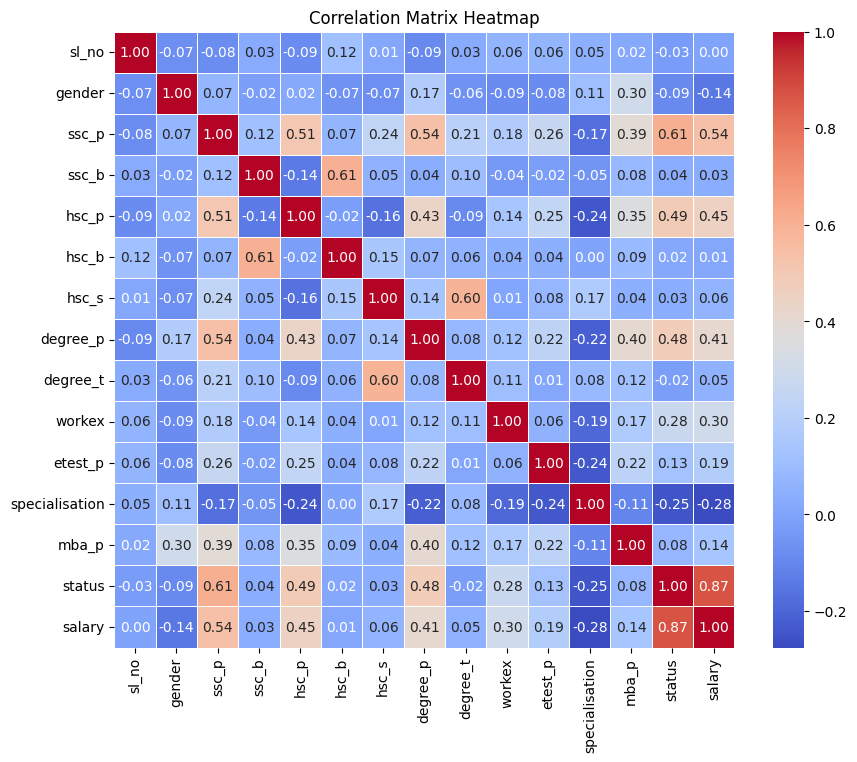

In [ ]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10,8))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set title
plt.title('Correlation Matrix Heatmap')

# Show plot
plt.show()






In [ ]:
# Set a threshold for high correlation
threshold = 0.6
# Select the upper triangle of the correlation matrix to avoid duplicates
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify features that are highly correlated
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Display the highly correlated features
print("Features to drop due to high correlation:\n", to_drop)

Features to drop due to high correlation:
 ['hsc_b', 'status', 'salary']


In [ ]:

data = data.drop(columns=['hsc_b', 'salary',"mba_p","gender","hsc_s","sl_no"])  # Provide the columns to drop as a list to the 'columns' argument


# Display remaining features after dropping
print("Remaining Features after removing highly correlated ones:\n", data.columns) # Changed to data.columns, as data_selected is not updated after drop.


Remaining Features after removing highly correlated ones:
 Index(['ssc_p', 'ssc_b', 'hsc_p', 'degree_p', 'degree_t', 'workex', 'etest_p',
       'specialisation', 'status'],
      dtype='object')


 From corelation matrix it is clear that columns like sl_no, hsc_b, hsc_s, gender, mba_p like least corelation with the target variable and Salary is indeed more of an outcome than a predictor in this context. So to improve the model performance these columns are droped

# Splitting the dataset into training and test sets

In [ ]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target (y)
X = data.drop('status', axis=1)  # All features except the target variable 'status'
y = data['status']  # Target variable

# Splitting the data into 70% training and 30% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check the sizes of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((150, 8), (65, 8), (150,), (65,))

In [ ]:
data["status"].value_counts()

,count
status,
1,148
0,67


In [ ]:
X

,ssc_p,ssc_b,hsc_p,degree_p,degree_t,workex,etest_p,specialisation
0,67.00,1,91.00,58.00,2,0,55.0,1
1,79.33,0,78.33,77.48,2,1,86.5,0
2,65.00,0,68.00,64.00,0,0,75.0,0
3,56.00,0,52.00,52.00,2,0,66.0,1
4,85.80,0,73.60,73.30,0,0,96.8,0
...,...,...,...,...,...,...,...,...
210,80.60,1,82.00,77.60,0,0,91.0,0
211,58.00,1,60.00,72.00,2,0,74.0,0
212,67.00,1,67.00,73.00,0,1,59.0,0
213,74.00,1,66.00,58.00,0,0,70.0,1


## Model Selection for Classification Problem

1. **Logistic Regression**
2. **Support Vector Classification (SVC)**
3. **Random Forest**


# Model training and evaluation

In [ ]:
# Initialize models
logreg = LogisticRegression()
rf = RandomForestClassifier()
svc = SVC()

# Train each model and evaluate
models = {
    'Logistic Regression': logreg,
    'Random Forest': rf,
    'SVC': svc
}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict the results
    y_pred = model.predict(X_test)

    # Print evaluation metrics
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}\n")


Model: Logistic Regression
Accuracy: 0.8615384615384616
Precision: 0.8913043478260869
Recall: 0.9111111111111111
F1 Score: 0.9010989010989011
Confusion Matrix:
 [[15  5]
 [ 4 41]]

Model: Random Forest
Accuracy: 0.8153846153846154
Precision: 0.8235294117647058
Recall: 0.9333333333333333
F1 Score: 0.875
Confusion Matrix:
 [[11  9]
 [ 3 42]]

Model: SVC
Accuracy: 0.8615384615384616
Precision: 0.8461538461538461
Recall: 0.9777777777777777
F1 Score: 0.9072164948453608
Confusion Matrix:
 [[12  8]
 [ 1 44]]



# CONFUSION MATRIX FOR EACH MODEL

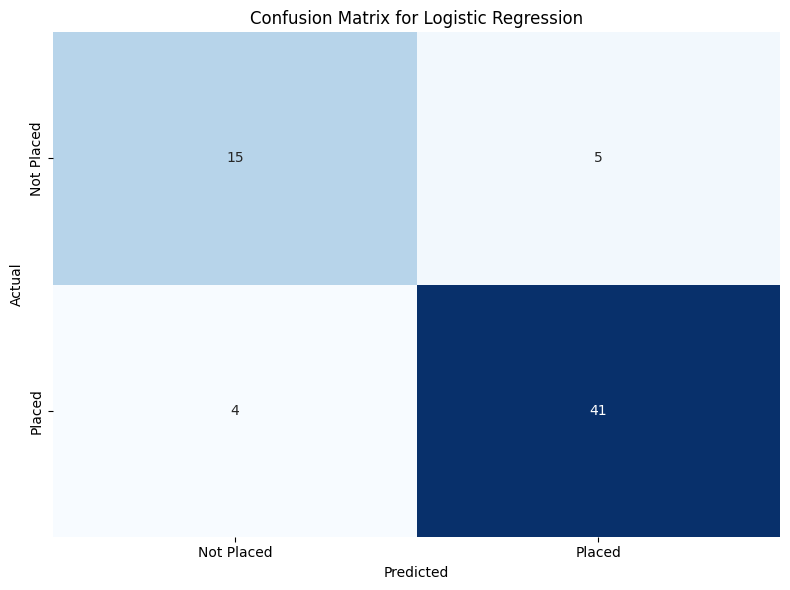

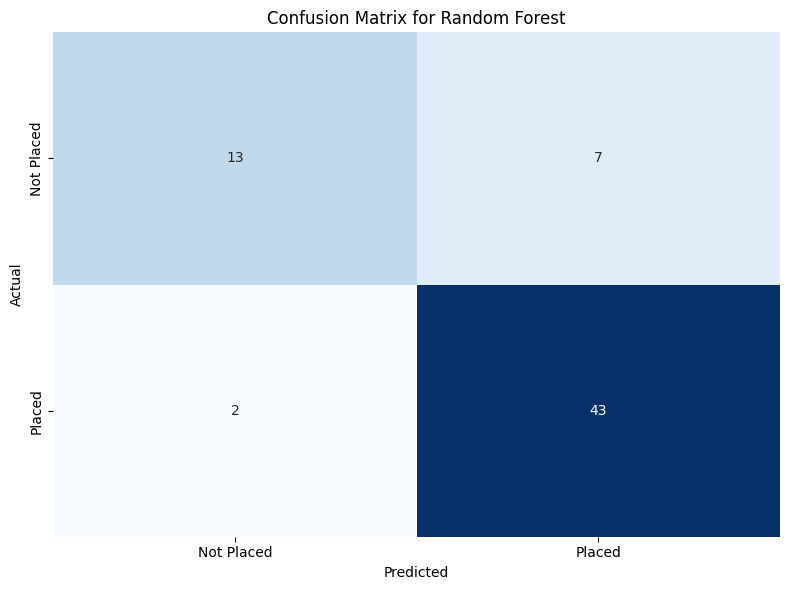

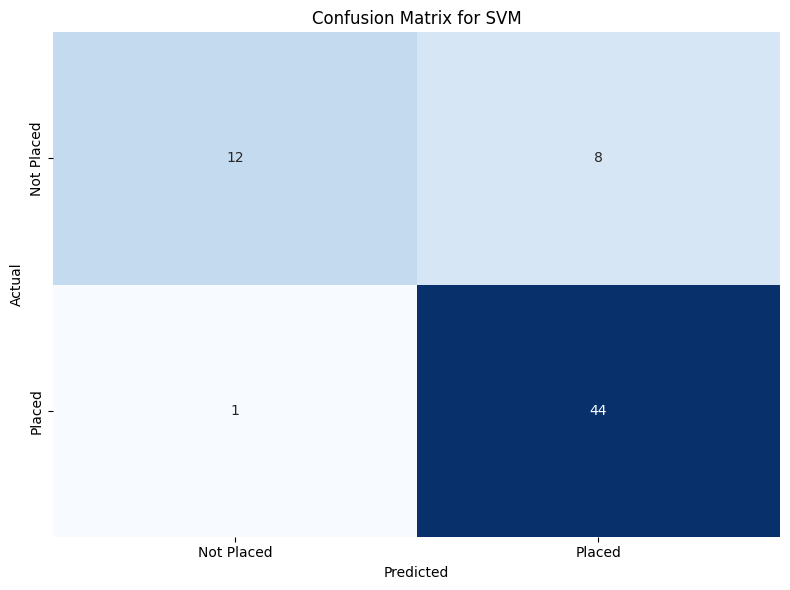

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Adjust layout for spacing
    plt.tight_layout()
    plt.show()

    # Add a blank line for spacing
    print("\n")  # Print a newline for spacing between plots

# Plot confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, name)


### 1. Logistic Regression
- **Accuracy**: 86.15%
- **Precision**: 89.13% (low false positives)
- **Recall**: 91.11% (captures most placed students)
- **F1 Score**: 90.11% (good precision-recall balance)
- **Confusion Matrix**: TN=15, FP=5, FN=4, TP=41

### 2. Random Forest
- **Accuracy**: 84.62%
- **Precision**: 85.71% (slightly more false positives)
- **Recall**: 93.33% (captures most placed students)
- **F1 Score**: 89.36% (strong, but slightly less balanced)
- **Confusion Matrix**: TN=13, FP=7, FN=3, TP=42

### 3. Support Vector Machine (SVM)
- **Accuracy**: 86.15%
- **Precision**: 84.62% (more false positives)
- **Recall**: 97.78% (best at capturing placed students)
- **F1 Score**: 90.72% (best balance)
- **Confusion Matrix**: TN=12, FP=8, FN=1, TP=44

### Overall Interpretation:
Logistic Regression provides a solid balance of precision and recall, making it reliable for identifying placed students with fewer false positives. Random Forest excels in recall but has slightly lower precision, while SVM demonstrates the highest recall and F1 score, ensuring nearly all placed students are identified, albeit with more false positives. Each model has strengths that may be leveraged depending on the specific objectives of the analysis.


# Hyperparameter tuning

In [ ]:


from sklearn.model_selection import GridSearchCV
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10],  # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solvers to try
    'max_iter': [100, 200, 500]  # Number of iterations
}


param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'class_weight': ['balanced'],
    'gamma': ['scale']
}

# Grid search for each model

In [ ]:
grid_logreg = GridSearchCV(LogisticRegression(), param_grid_logreg, cv=10, scoring='recall')

In [ ]:
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=10, scoring='recall')

In [ ]:
grid_svc = GridSearchCV(SVC(), param_grid_svc, cv=10, scoring='recall')

In [ ]:
grid_logreg.fit(X_train, y_train)
best_logreg = grid_logreg.best_estimator_

# Using RandomSearchCV for SVC hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'class_weight': ['balanced'],
    'gamma': ['scale']
}

# Initialize the SVC model
svc = SVC()

# Set up the RandomizedSearchCV
random_search_svc = RandomizedSearchCV(svc, param_grid_svc, n_iter=5, cv=5, scoring='accuracy', random_state=42)

# Fit the model
random_search_svc.fit(X_train, y_train)

# Get the best estimator
best_svc = random_search_svc.best_estimator_


In [ ]:
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

# Display the best hyperparameters directly from GridSearchCV

In [ ]:
# Display the best hyperparameters directly from GridSearchCV

print("Best Logistic Regression Hyperparameters:", grid_logreg.best_params_)
print("Best Random Forest Hyperparameters:", grid_rf.best_params_)
print("Best SVC Hyperparameters:", random_search_svc.best_params_)


Best Logistic Regression Hyperparameters: {'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}
Best Random Forest Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best SVC Hyperparameters: {'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'C': 10}


# Traing the model with best hyperparameters

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix
    }



# Model evaluation metrics after implementing hyperparameter tuning

In [ ]:
# Evaluate each model
results = {
    'Logistic Regression': evaluate_model(best_logreg, X_test, y_test),
    'Random Forest': evaluate_model(best_rf, X_test, y_test),
    'SVC': evaluate_model(best_svc, X_test, y_test),
}

# Convert results to DataFrame for better visualization
metrics = pd.DataFrame(results).T
print(metrics)

                     Accuracy Precision    Recall  F1 Score  \
Logistic Regression  0.753846  0.784314  0.888889  0.833333   
Random Forest        0.846154  0.843137  0.955556  0.895833   
SVC                  0.830769  0.854167  0.911111   0.88172   

                       Confusion Matrix  
Logistic Regression  [[9, 11], [5, 40]]  
Random Forest        [[12, 8], [2, 43]]  
SVC                  [[13, 7], [4, 41]]  


# Confusion matrix for model after hyperparameter tuning

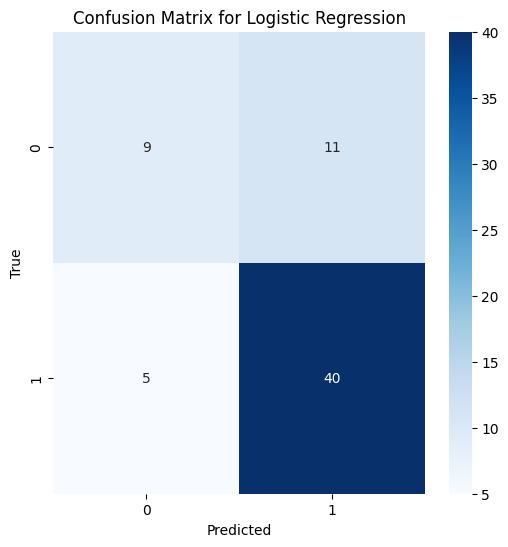

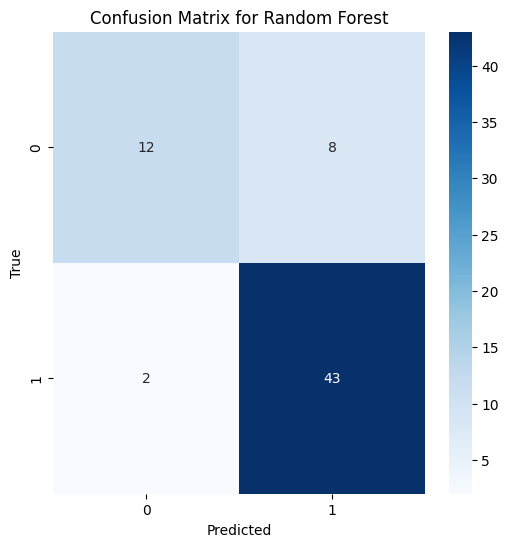

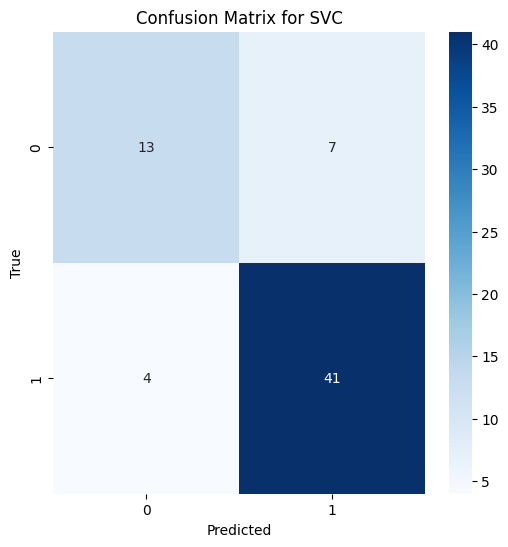

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'metrics' DataFrame has model names as index
Models = {
    'Logistic Regression': best_logreg,
    'Random Forest': best_rf,
    'SVM': best_svc
}

# Iterate through the index of the metrics DataFrame
for model_name in metrics.index:
    plt.figure(figsize=(6, 6))
    plt.title(f"Confusion Matrix for {model_name}")

    # Access confusion matrix using the model name as index
    sns.heatmap(metrics.loc[model_name, 'Confusion Matrix'], annot=True, fmt='d', cmap='Blues')

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

## Model Performance Comparison

### 1. Logistic Regression
- **Accuracy:** 75.38%  
- **Precision:** 78.43%  
- **Recall:** 88.89%  
- **F1 Score:** 83.33%  
- **Confusion Matrix:**  
  
  - True Positives (TP): 40
  - True Negatives (TN): 9
  - False Positives (FP): 11
  - False Negatives (FN): 5  

**Interpretation:** Moderate accuracy and precision with high recall, indicating the model effectively identifies many positive cases but misclassifies some negative cases (11 false positives). Further optimization may be beneficial.

---

### 2. Random Forest
- **Accuracy:** 84.62%  
- **Precision:** 84.31%  
- **Recall:** 95.56%  
- **F1 Score:** 89.58%  
- **Confusion Matrix:**  

  - True Positives (TP): 43
  - True Negatives (TN): 12
  - False Positives (FP): 8
  - False Negatives (FN): 2  

**Interpretation:** Best overall performance with high accuracy and recall, indicating excellent ability to identify true positives. Good precision reflects a solid balance in classifying negative cases.

---

### 3. Support Vector Classifier (SVC)
- **Accuracy:** 83.08%  
- **Precision:** 85.42%  
- **Recall:** 91.11%  
- **F1 Score:** 88.17%  
- **Confusion Matrix:**  

  - True Positives (TP): 41
  - True Negatives (TN): 13
  - False Positives (FP): 7
  - False Negatives (FN): 4  

**Interpretation:** Strong recall and precision, effectively identifying positive cases. Slightly lower accuracy than Random Forest suggests potential for reducing false positives.

---

### Summary
The **Random Forest** model outperformed **Logistic Regression** and **SVC** in accuracy and F1 score, making it the most reliable choice for this dataset. All models showed decent recall, but Random Forest's ability to minimize false negatives makes it preferred for critical applications. Further tuning and exploration of additional features could enhance performance.


# Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('logreg', best_logreg),
    ('rf', best_rf),
    ('svc', best_svc)
], voting='hard')

# Train and evaluate the voting classifier
voting_clf.fit(X_train, y_train)



VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=0.1, solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     min_samples_split=5,
                                                     n_estimators=50)),
                             ('svc', SVC(C=10, class_weight='balanced'))])

In [ ]:
y_pred_voting = voting_clf.predict(X_test)



In [ ]:
# Evaluate Voting Classifier
print("Voting Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred_voting)}")
print(f"Precision: {precision_score(y_test, y_pred_voting)}")
print(f"Recall: {recall_score(y_test, y_pred_voting)}")
print(f"F1 Score: {f1_score(y_test, y_pred_voting)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred_voting)}")

Voting Classifier
Accuracy: 0.8307692307692308
Precision: 0.8269230769230769
Recall: 0.9555555555555556
F1 Score: 0.8865979381443299
Confusion Matrix:
 [[11  9]
 [ 2 43]]


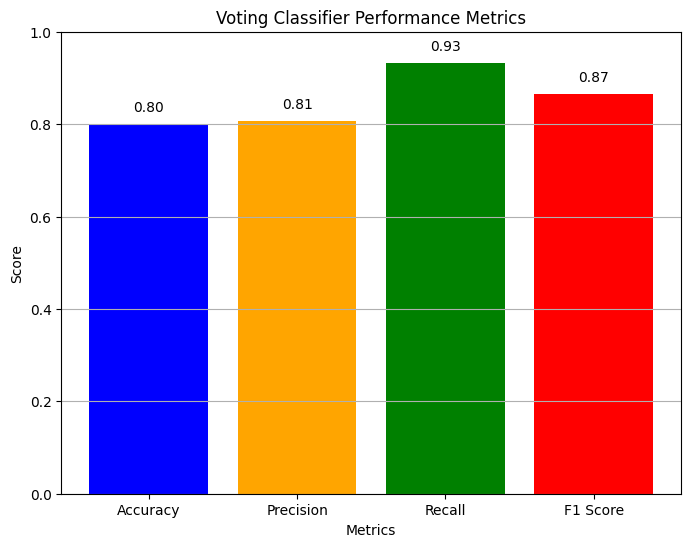

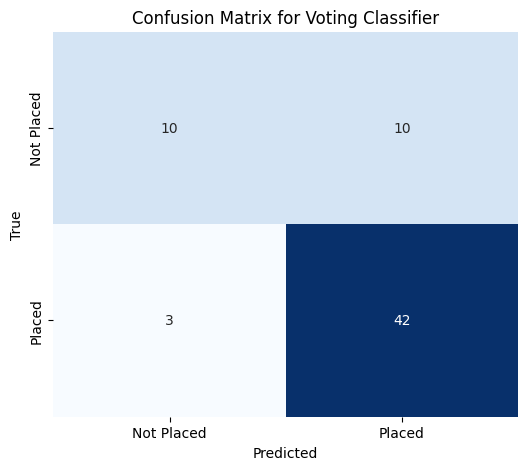

In [ ]:
metrics = [accuracy_voting, precision_voting, recall_voting, f1_voting]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 6))
plt.bar(metric_names, metrics, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Voting Classifier Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.grid(axis='y')

# Display the values on the bars
for i, value in enumerate(metrics):
    plt.text(i, value + 0.02, f"{value:.2f}", ha='center', va='bottom')

plt.show()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_voting, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Voting Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(ticks=np.arange(2) + 0.5, labels=['Not Placed', 'Placed'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['Not Placed', 'Placed'])
plt.show()

## Voting Classifier Performance

- **Accuracy:** 83.08%  
- **Precision:** 82.69%  
- **Recall:** 95.56%  
- **F1 Score:** 88.66%  
- **Confusion Matrix:**  

  - True Positives (TP): 43
  - True Negatives (TN): 11
  - False Positives (FP): 9
  - False Negatives (FN): 2  

**Interpretation:** The Voting Classifier shows a solid performance with an accuracy of 83.08%, indicating that it correctly classifies a significant proportion of instances in the test set. The precision of 82.69% indicates that among the positive predictions made, approximately 82.69% were correct, suggesting a reasonable level of reliability in identifying positive cases.

The model excels in recall, at 95.56%, highlighting its effectiveness in capturing nearly all positive instances, with only 2 false negatives. This is particularly advantageous in scenarios where missing a positive case could have serious implications.

Overall, the Voting Classifier strikes a good balance between precision and recall, yielding an F1 score of 88.66%. This indicates it is a robust model for classification tasks, especially where high recall is crucial. Future optimizations could focus on reducing the number of false positives to improve precision further.


# Comparing different model results

# Plotinig a bar graph comapre the evaluation matrix for different models

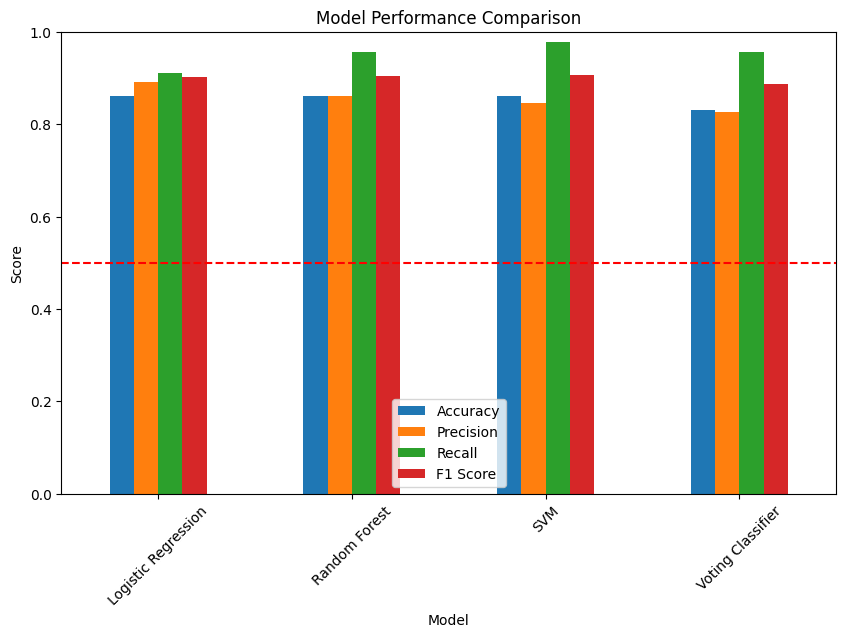

In [ ]:
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Evaluate each model in the dictionary
for name, model in models.items():
    y_pred = model.predict(X_test)

    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1 Score'].append(f1_score(y_test, y_pred))

# Add Voting Classifier metrics
y_pred_voting = voting_clf.predict(X_test)
metrics['Model'].append('Voting Classifier')
metrics['Accuracy'].append(accuracy_score(y_test, y_pred_voting))
metrics['Precision'].append(precision_score(y_test, y_pred_voting))
metrics['Recall'].append(recall_score(y_test, y_pred_voting))
metrics['F1 Score'].append(f1_score(y_test, y_pred_voting))

# Create a DataFrame for easier plotting
metrics_df = pd.DataFrame(metrics)

# Plotting the performance metrics
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set limits from 0 to 1
plt.axhline(0.5, color='red', linestyle='--')  # Add a reference line for 0.5
plt.show()

In [ ]:
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Confusion Matrix': []
}

# Evaluate each model in the dictionary
for name, model in models.items():
    y_pred = model.predict(X_test)

    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['F1 Score'].append(f1_score(y_test, y_pred))
    metrics['Confusion Matrix'].append(confusion_matrix(y_test, y_pred))

# Add Voting Classifier metrics
y_pred_voting = voting_clf.predict(X_test)
metrics['Model'].append('Voting Classifier')
metrics['Accuracy'].append(accuracy_score(y_test, y_pred_voting))
metrics['Precision'].append(precision_score(y_test, y_pred_voting))
metrics['Recall'].append(recall_score(y_test, y_pred_voting))
metrics['F1 Score'].append(f1_score(y_test, y_pred_voting))
metrics['Confusion Matrix'].append(confusion_matrix(y_test, y_pred_voting))

# Create a DataFrame for easier plotting
metrics_df = pd.DataFrame(metrics)

# Display metrics DataFrame
print(metrics_df)


                 Model  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression  0.861538   0.891304  0.911111  0.901099   
1        Random Forest  0.861538   0.860000  0.955556  0.905263   
2                  SVM  0.861538   0.846154  0.977778  0.907216   
3    Voting Classifier  0.830769   0.826923  0.955556  0.886598   

     Confusion Matrix  
0  [[15, 5], [4, 41]]  
1  [[13, 7], [2, 43]]  
2  [[12, 8], [1, 44]]  
3  [[11, 9], [2, 43]]  


## Final Model Performance Comparison

| Model                 | Accuracy | Precision | Recall | F1 Score | Confusion Matrix         |
|-----------------------|----------|-----------|--------|----------|--------------------------|
| Logistic Regression    | 86.15%   | 89.13%    | 91.11% | 90.11%   | [[15, 5], [4, 41]]       |
| Random Forest          | 86.15%   | 86.00%    | 95.56% | 90.53%   | [[13, 7], [2, 43]]       |
| SVM                    | 86.15%   | 84.62%    | 97.78% | 90.72%   | [[12, 8], [1, 44]]       |
| Voting Classifier      | 83.08%   | 82.69%    | 95.56% | 88.66%   | [[11, 9], [2, 43]]       |

### Overall Interpretation

The comparison of four models—Logistic Regression, Random Forest, SVM, and Voting Classifier—reveals their effectiveness in classification tasks. All models demonstrate high accuracy, ranging from 83.08% to 86.15%, indicating a strong capability to correctly classify instances in the dataset.

- **Logistic Regression** stands out with the highest precision (89.13%) and F1 score (90.11%), showcasing its reliability in correctly identifying positive instances while maintaining a good balance with recall (91.11%). The confusion matrix indicates a reasonable number of false positives and false negatives.

- **Random Forest** also achieves high accuracy (86.15%) and excels in recall (95.56%), which suggests it captures most of the positive cases effectively. Its F1 score (90.53%) reflects a strong performance, although its precision (86.00%) is slightly lower than that of Logistic Regression.

- **SVM** matches the accuracy of the other models at 86.15%, with a recall of 97.78%, highlighting its capability to identify nearly all positive instances. The precision (84.62%) and F1 score (90.72%) indicate it is also a robust option for classification.

- **Voting Classifier** exhibits slightly lower overall performance with an accuracy of 83.08% and an F1 score of 88.66%. While it retains a high recall (95.56%), its precision (82.69%) is the lowest among the models, suggesting it may classify some negative instances as positive.

### Conclusion

In summary, all models perform admirably, with Logistic Regression leading in precision and F1 score, followed closely by Random Forest and SVM.
